<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#文件操作" data-toc-modified-id="文件操作-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>文件操作</a></span></li><li><span><a href="#人脸检测" data-toc-modified-id="人脸检测-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>人脸检测</a></span></li><li><span><a href="#光照校准" data-toc-modified-id="光照校准-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>光照校准</a></span></li></ul></div>

In [1]:
import cv2
import glob
import time
import os
import sys
import datetime
import dlib
import numpy as np
import multiprocessing
from multiprocessing import Pool
import matplotlib.pylab as plt
import tqdm
import dataset

%matplotlib inline

PREDICTER_5_PATH = dataset.LANDMARKS_5_PATH
PREDICTER_68_PATH = dataset.LANDMARKS_68_PATH

# 文件操作

In [2]:
def face_pre_get_image_path(imagedir):
    return glob.glob(os.path.join(imagedir, '*'))

In [3]:
face_pre_get_image_path(r'F:\facial_images\TS\TS_frontal')

['F:\\facial_images\\TS\\TS_frontal\\2111-20030211-20170815-1.jpg',
 'F:\\facial_images\\TS\\TS_frontal\\2111-20030211-20171121-1.jpg',
 'F:\\facial_images\\TS\\TS_frontal\\2111-20030211-20180227-1.jpg',
 'F:\\facial_images\\TS\\TS_frontal\\2112-19960823-20160712-1.jpg',
 'F:\\facial_images\\TS\\TS_frontal\\2112-19960823-20170119-1.JPG',
 'F:\\facial_images\\TS\\TS_frontal\\2112-19960823-20180208-1.jpg',
 'F:\\facial_images\\TS\\TS_frontal\\2114-20000713-20160712-1.jpg',
 'F:\\facial_images\\TS\\TS_frontal\\2114-20000713-20170207-1.JPG',
 'F:\\facial_images\\TS\\TS_frontal\\2115-20011219-20170228-1.jpg',
 'F:\\facial_images\\TS\\TS_frontal\\2115-20011219-20170615-1.JPG',
 'F:\\facial_images\\TS\\TS_frontal\\2115-20011219-20180208-1.jpg',
 'F:\\facial_images\\TS\\TS_frontal\\2118-20070605-20160714-1.jpg',
 'F:\\facial_images\\TS\\TS_frontal\\2118-20070605-20170117-1.JPG',
 'F:\\facial_images\\TS\\TS_frontal\\2118-20070605-20170427-1.JPG',
 'F:\\facial_images\\TS\\TS_frontal\\2118-200706

In [4]:
for i in face_pre_get_image_path(r'F:\facial_images\TS\TS_frontal'):
    print(os.path.split(i)[-1])

2111-20030211-20170815-1.jpg
2111-20030211-20171121-1.jpg
2111-20030211-20180227-1.jpg
2112-19960823-20160712-1.jpg
2112-19960823-20170119-1.JPG
2112-19960823-20180208-1.jpg
2114-20000713-20160712-1.jpg
2114-20000713-20170207-1.JPG
2115-20011219-20170228-1.jpg
2115-20011219-20170615-1.JPG
2115-20011219-20180208-1.jpg
2118-20070605-20160714-1.jpg
2118-20070605-20170117-1.JPG
2118-20070605-20170427-1.JPG
2118-20070605-20170803-1.jpg
2120-20040115-20160714-1.jpg
2121-20020603-20160714-1.jpg
2121-20020603-20170117-1.JPG
2121-20020603-20180201-1.jpg
2122-19990125-20160714-1.jpg
2122-19990125-20170627-1.JPG
2122-19990125-20180201-1.jpg
2126-19990710-20160719-1.jpg
2126-19990710-20170207-1.JPG
2128-19981015-20160719-1.jpg
2131-20051218-20170815-1.jpg
2131-20051218-20171128-1.jpg
2131-20051218-20180301-1.jpg
2135-20111204-20160726-1.jpg
2135-20111204-20170822-1.jpg
2137-20040228-20160726-1.jpg
2138-20000208-20160726-1.jpg
2138-20000208-20171031-1.jpg
2139-19970908-20160726-1.jpg
2143-20010202-

In [5]:
import os
for root, dirs, files in os.walk(r'F:\facial_images\TS\TS_frontal', topdown=False):
    print(root)
    print(dirs)
    print(files)
#     for name in files:
#         print(os.path.join(root, name))
#     for name in dirs:
#         print(os.path.join(root, name))

F:\facial_images\TS\TS_frontal
[]
['2111-20030211-20170815-1.jpg', '2111-20030211-20171121-1.jpg', '2111-20030211-20180227-1.jpg', '2112-19960823-20160712-1.jpg', '2112-19960823-20170119-1.JPG', '2112-19960823-20180208-1.jpg', '2114-20000713-20160712-1.jpg', '2114-20000713-20170207-1.JPG', '2115-20011219-20170228-1.jpg', '2115-20011219-20170615-1.JPG', '2115-20011219-20180208-1.jpg', '2118-20070605-20160714-1.jpg', '2118-20070605-20170117-1.JPG', '2118-20070605-20170427-1.JPG', '2118-20070605-20170803-1.jpg', '2120-20040115-20160714-1.jpg', '2121-20020603-20160714-1.jpg', '2121-20020603-20170117-1.JPG', '2121-20020603-20180201-1.jpg', '2122-19990125-20160714-1.jpg', '2122-19990125-20170627-1.JPG', '2122-19990125-20180201-1.jpg', '2126-19990710-20160719-1.jpg', '2126-19990710-20170207-1.JPG', '2128-19981015-20160719-1.jpg', '2131-20051218-20170815-1.jpg', '2131-20051218-20171128-1.jpg', '2131-20051218-20180301-1.jpg', '2135-20111204-20160726-1.jpg', '2135-20111204-20170822-1.jpg', '2137

# 人脸检测

In [36]:
imagedir = r'E:\pycharmpro\faceDig\dataset\image\test2'
savedir = r'E:\pycharmpro\faceDig\dataset\image\test_2'

path = r'F:\facial_images\TS\TS_frontal\4105-20040713-20180130-1.JPG'

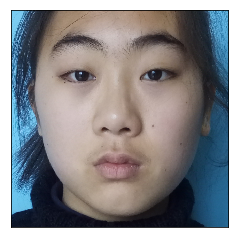

In [3]:
detector = dlib.get_frontal_face_detector()
sp = dlib.shape_predictor(PREDICTER_5_PATH)

img = cv2.imread(path, cv2.IMREAD_COLOR)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

dets = detector(img, 1)
num_faces = len(dets)
if num_faces == 0:
    print("Sorry, there were no faces found in '{}'".format(path))
    exit()

faces = dlib.full_object_detections()
for detection in dets:
    faces.append(sp(img, detection))

# images = dlib.get_face_chips(img, faces, size=160, padding=0.25)
images = dlib.get_face_chips(img, faces, size=640, padding=0.25)

plt.imshow(images[0])
plt.xticks([])
plt.yticks([])
plt.show()

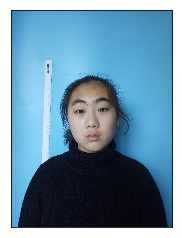

In [4]:
img = cv2.imread(path, cv2.IMREAD_COLOR)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img)

plt.xticks([])
plt.yticks([])
plt.show()

In [5]:
pwd = os.getcwd()
pwd

'E:\\pycharmpro\\faceDig'

In [14]:
from mtcnn.mtcnn import MTCNN
import cv2

In [15]:
img = cv2.imread(path)
detector = MTCNN()
print(detector.detect_faces(img))

[{'box': [1108, 1499, 946, 1237], 'confidence': 0.9980456829071045, 'keypoints': {'left_eye': (1345, 1998), 'right_eye': (1772, 1946), 'nose': (1541, 2223), 'mouth_left': (1432, 2482), 'mouth_right': (1735, 2443)}}]


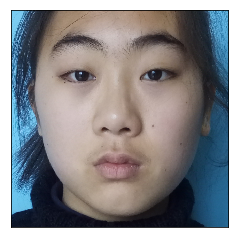

In [16]:
detector = dlib.get_frontal_face_detector()
sp = dlib.shape_predictor(PREDICTER_5_PATH)

img = cv2.imread(path, cv2.IMREAD_COLOR)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

dets = detector(img, 1)
num_faces = len(dets)
if num_faces == 0:
    print("Sorry, there were no faces found in '{}'".format(path))
    exit()

faces = dlib.full_object_detections()
for detection in dets:
    faces.append(sp(img, detection))

# images = dlib.get_face_chips(img, faces, size=160, padding=0.25)
images = dlib.get_face_chips(img, faces, size=640, padding=0.25)

plt.imshow(images[0])
plt.xticks([])
plt.yticks([])
plt.show()

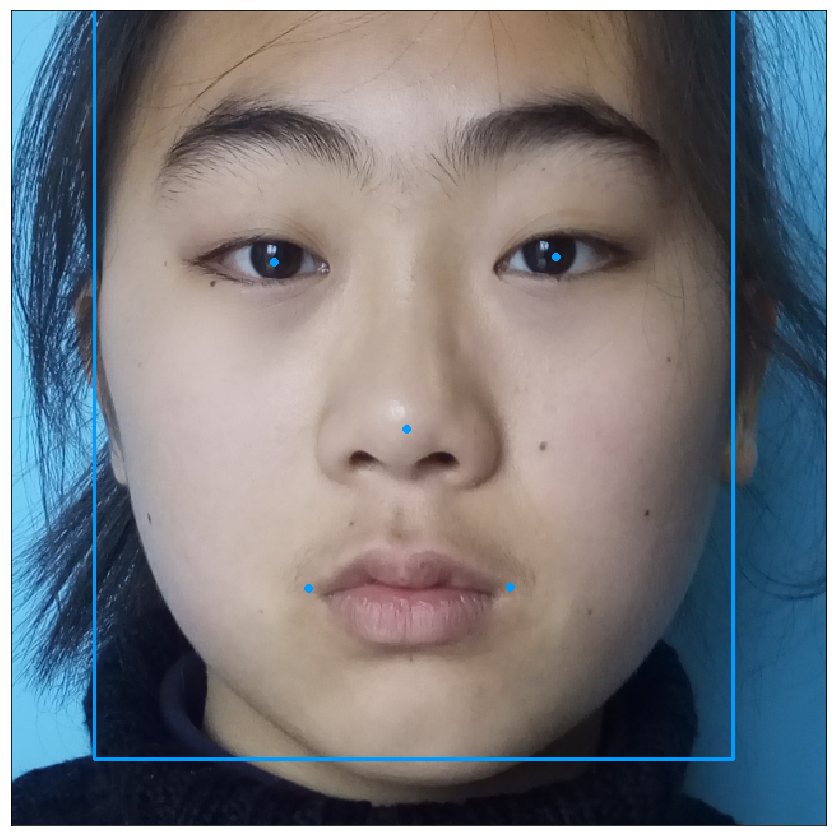

[{'box': [65, -59, 501, 647], 'confidence': 0.9999895095825195, 'keypoints': {'left_eye': (206, 198), 'right_eye': (427, 194), 'nose': (310, 329), 'mouth_left': (233, 454), 'mouth_right': (391, 453)}}]


In [17]:
import cv2
from mtcnn.mtcnn import MTCNN

detector = MTCNN()

image = images[0]
#image = cv2.imread(path)
result = detector.detect_faces(image)

# Result is an array with all the bounding boxes detected. We know that for 'ivan.jpg' there is only one.
bounding_box = result[0]['box']
keypoints = result[0]['keypoints']

cv2.rectangle(image,
              (bounding_box[0], bounding_box[1]),
              (bounding_box[0]+bounding_box[2], bounding_box[1] + bounding_box[3]),
              (0,155,255),
              2)

cv2.circle(image,(keypoints['left_eye']), 2, (0,155,255), 2)
cv2.circle(image,(keypoints['right_eye']), 2, (0,155,255), 2)
cv2.circle(image,(keypoints['nose']), 2, (0,155,255), 2)
cv2.circle(image,(keypoints['mouth_left']), 2, (0,155,255), 2)
cv2.circle(image,(keypoints['mouth_right']), 2, (0,155,255), 2)

plt.figure(figsize=(15,15))
plt.imshow(image)

plt.xticks([])
plt.yticks([])
plt.show()

image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
cv2.imwrite("ivan_drawn.jpg", image)

print(result)

In [18]:
print(image.shape)
print(image)

(640, 640, 3)
[[[238 201 119]
  [239 202 120]
  [240 203 121]
  ...
  [221 181  93]
  [225 185  97]
  [223 183  95]]

 [[239 202 120]
  [239 202 120]
  [239 202 120]
  ...
  [225 184  99]
  [224 184  96]
  [226 186  98]]

 [[239 202 120]
  [240 203 121]
  [239 202 120]
  ...
  [227 186 101]
  [221 180  95]
  [224 183  97]]

 ...

 [[ 40  21  13]
  [ 41  22  14]
  [ 40  21  13]
  ...
  [148 105  38]
  [148 105  38]
  [148 105  38]]

 [[ 40  21  14]
  [ 41  22  15]
  [ 41  22  15]
  ...
  [148 105  38]
  [148 105  38]
  [148 105  38]]

 [[ 45  26  19]
  [ 47  28  21]
  [ 46  28  21]
  ...
  [148 105  38]
  [149 106  39]
  [149 106  39]]]


In [19]:
crop_face = image[0:500,100:500]
if bounding_box[1] < 0:
    bounding_box[3] = bounding_box[1]+bounding_box[3]
    bounding_box[1] = 0
    
crop_face = image[bounding_box[1]:bounding_box[1]+bounding_box[3],bounding_box[0]:bounding_box[0]+bounding_box[2]]
print(crop_face)

[[[255 155   0]
  [255 155   0]
  [ 88  64  43]
  ...
  [ 69  52  39]
  [ 69  52  36]
  [255 155   0]]

 [[255 155   0]
  [255 155   0]
  [ 74  52  31]
  ...
  [ 69  52  39]
  [ 69  52  36]
  [255 155   0]]

 [[255 155   0]
  [255 155   0]
  [ 77  51  31]
  ...
  [ 70  54  41]
  [ 70  52  37]
  [255 155   0]]

 ...

 [[255 155   0]
  [255 155   0]
  [ 55  32  22]
  ...
  [108  74  29]
  [111  76  32]
  [255 155   0]]

 [[255 155   0]
  [255 155   0]
  [ 53  33  19]
  ...
  [111  74  30]
  [112  75  31]
  [255 155   0]]

 [[255 155   0]
  [255 155   0]
  [255 155   0]
  ...
  [255 155   0]
  [255 155   0]
  [255 155   0]]]


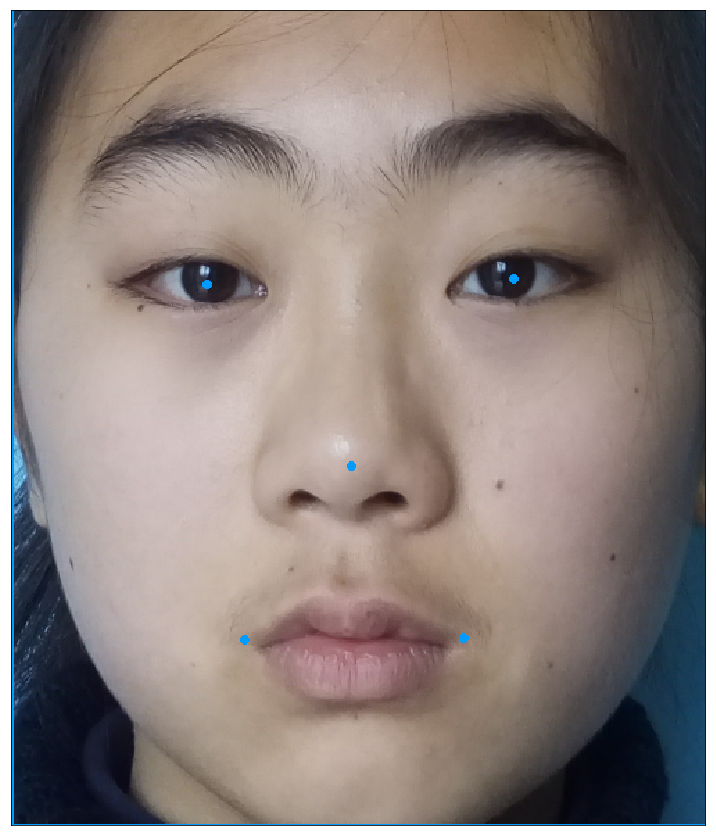

True

In [24]:
plt.figure(figsize=(15,15))
plt.imshow(crop_face)

#crop_face = cv2.cvtColor(crop_face, cv2.COLOR_BGR2RGB)
plt.xticks([])
plt.yticks([])
plt.show()

crop_face = cv2.cvtColor(crop_face, cv2.COLOR_BGR2RGB)
cv2.imwrite("drawn.jpg", crop_face)

[{'box': [49, -70, 512, 642], 'confidence': 0.9999833106994629, 'keypoints': {'left_eye': (198, 198), 'right_eye': (431, 197), 'nose': (312, 324), 'mouth_left': (231, 447), 'mouth_right': (399, 451)}}]


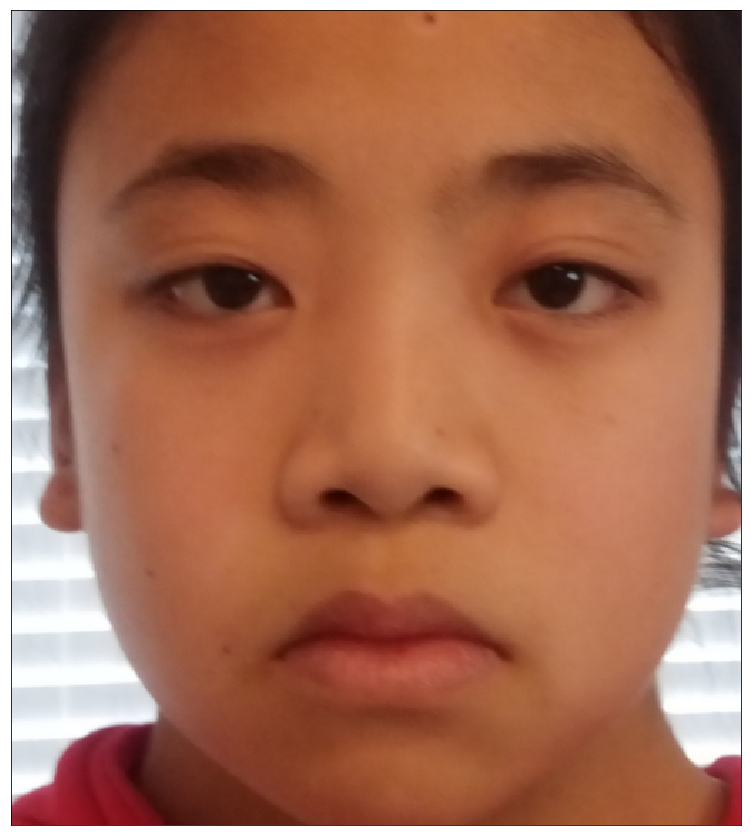

True

In [37]:
from mtcnn.mtcnn import MTCNN
import cv2

# dlib人脸对齐
detector = dlib.get_frontal_face_detector()
sp = dlib.shape_predictor(PREDICTER_5_PATH)

img = cv2.imread(path, cv2.IMREAD_COLOR)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

dets = detector(img, 1)
num_faces = len(dets)
if num_faces == 0:
    print("Sorry, there were no faces found in '{}'".format(path))
    exit()

faces = dlib.full_object_detections()
for detection in dets:
    faces.append(sp(img, detection))

images = dlib.get_face_chips(img, faces, size=640, padding=0.25)

# mtcnn人脸检测
detector = MTCNN()

image = images[0]

result = detector.detect_faces(image)

# Result is an array with all the bounding boxes detected. We know that for 'ivan.jpg' there is only one.
bounding_box = result[0]['box']
keypoints = result[0]['keypoints']

#v2.rectangle(image,
#             (bounding_box[0], bounding_box[1]),
#             (bounding_box[0]+bounding_box[2], bounding_box[1] + bounding_box[3]),
#             (0,155,255),
#             1)

#v2.circle(image,(keypoints['left_eye']), 2, (0,155,255), 2)
#v2.circle(image,(keypoints['right_eye']), 2, (0,155,255), 2)
#v2.circle(image,(keypoints['nose']), 2, (0,155,255), 2)
#v2.circle(image,(keypoints['mouth_left']), 2, (0,155,255), 2)
#v2.circle(image,(keypoints['mouth_right']), 2, (0,155,255), 2)

#mage= cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
#v2.imwrite("ivan_drawn.jpg", image)

print(result)

# 人脸部位剪裁
crop_face = image[0:500,100:500]
if bounding_box[1] < 0:
    bounding_box[3] = bounding_box[1]+bounding_box[3]
    bounding_box[1] = 0
    
crop_face = image[bounding_box[1]:bounding_box[1]+bounding_box[3],bounding_box[0]:bounding_box[0]+bounding_box[2]]

plt.figure(figsize=(15,15))
plt.imshow(crop_face)

crop_face = cv2.cvtColor(crop_face, cv2.COLOR_BGR2RGB)
plt.xticks([])
plt.yticks([])
plt.show()

cv2.imwrite("drawn.jpg", crop_face)

# 光照校准

In [12]:
import cv2
import matplotlib.pyplot as plt

In [10]:
img = cv2.imread(r'C:\Users\eh\Desktop\2131-20051218-20170815-1.jpg', cv2.IMREAD_COLOR)
print(img)
gray_face = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

cv2.imwrite(r'C:\Users\eh\Desktop\2.jpg', gray_face)

[[[237 205  98]
  [240 208 101]
  [243 211 104]
  ...
  [221 185  71]
  [219 183  69]
  [218 182  68]]

 [[241 209 102]
  [241 209 102]
  [243 211 104]
  ...
  [219 183  69]
  [221 185  71]
  [220 184  70]]

 [[241 209 102]
  [241 209 102]
  [244 210 103]
  ...
  [221 185  71]
  [221 185  71]
  [221 185  71]]

 ...

 [[255 228 117]
  [255 228 117]
  [255 227 116]
  ...
  [235 200  80]
  [234 199  79]
  [234 199  79]]

 [[255 229 115]
  [255 228 117]
  [254 227 116]
  ...
  [238 201  81]
  [236 201  81]
  [235 200  80]]

 [[255 230 114]
  [255 229 115]
  [255 229 115]
  ...
  [235 202  79]
  [235 202  79]
  [234 201  78]]]


True

In [75]:
def grey_world(path):

    nimg = cv2.imread(path, cv2.IMREAD_COLOR)
    nimg = nimg.transpose(2, 0, 1).astype(np.uint32)  
    avgB = np.average(nimg[0])  
    avgG = np.average(nimg[1])  
    avgR = np.average(nimg[2])  

    avg = (avgB + avgG + avgR) / 3  

    nimg[0] = np.minimum(nimg[0] * (avg / avgB), 255)  
    nimg[1] = np.minimum(nimg[1] * (avg / avgG), 255)  
    nimg[2] = np.minimum(nimg[2] * (avg / avgR), 255)
    nimg = nimg.transpose(1, 2, 0).astype(np.uint8)
    return  nimg

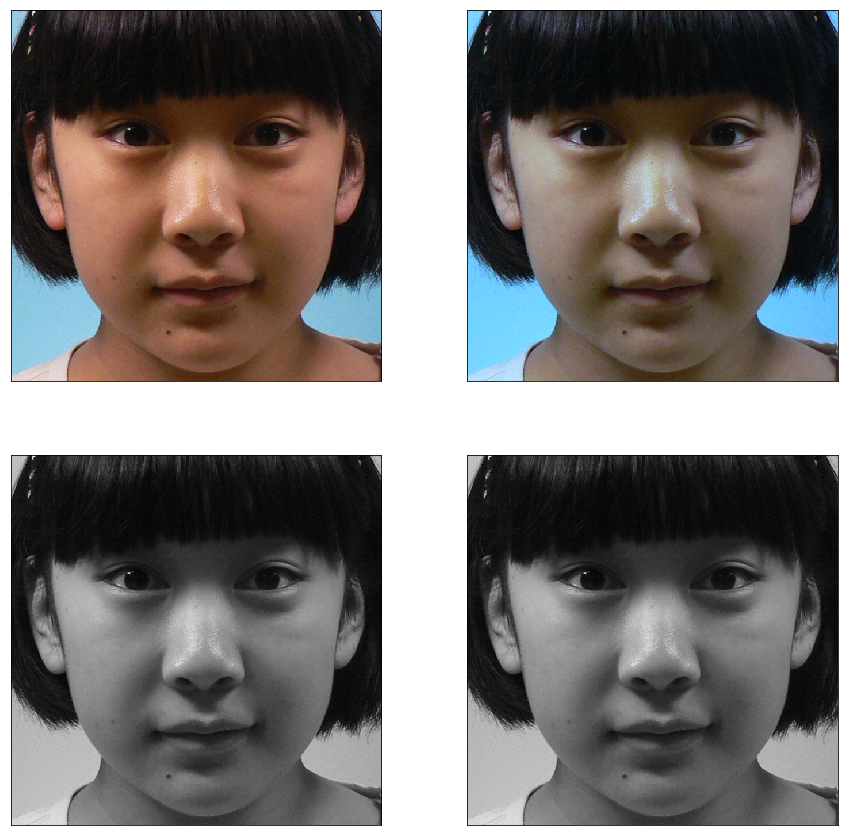

In [76]:
or_img = cv2.imread(r'C:\Users\eh\Desktop\1.jpg')
#print(or_img)
grey_face = grey_world(r'C:\Users\eh\Desktop\1.jpg')
#print(gray_face)
or_rgb_img = cv2.imread(r'C:\Users\eh\Desktop\2114-20000713-20160712-1.jpg', cv2.IMREAD_COLOR)
or_rgb_img = cv2.cvtColor(or_rgb_img, cv2.COLOR_BGR2RGB)
grey_world_rgb = grey_world(r'C:\Users\eh\Desktop\2114-20000713-20160712-1.jpg')
grey_world_rgb = cv2.cvtColor(grey_world_rgb, cv2.COLOR_BGR2RGB)

fig = plt.figure(figsize=(15,15))
ax1 = fig.add_subplot(221)
ax1.set_xticks([])
ax1.set_yticks([])
plt.imshow(or_rgb_img)

ax2 = fig.add_subplot(222)
ax2.set_xticks([])
ax2.set_yticks([])
plt.imshow(grey_world_rgb)

ax3 = fig.add_subplot(223)
ax3.set_xticks([])
ax3.set_yticks([])
plt.imshow(or_img)

ax4 = fig.add_subplot(224)
ax4.set_xticks([])
ax4.set_yticks([])
plt.imshow(grey_face)

In [77]:
def hisEqulColor(path): 
    img = cv2.imread(path, cv2.IMREAD_COLOR)
    ycrcb = cv2.cvtColor(img, cv2.COLOR_BGR2YCR_CB)  
    channels = cv2.split(ycrcb)  
    cv2.equalizeHist(channels[0], channels[0])   
    cv2.merge(channels, ycrcb)  
    img_eq=cv2.cvtColor(ycrcb, cv2.COLOR_YCR_CB2BGR)  
    return img_eq

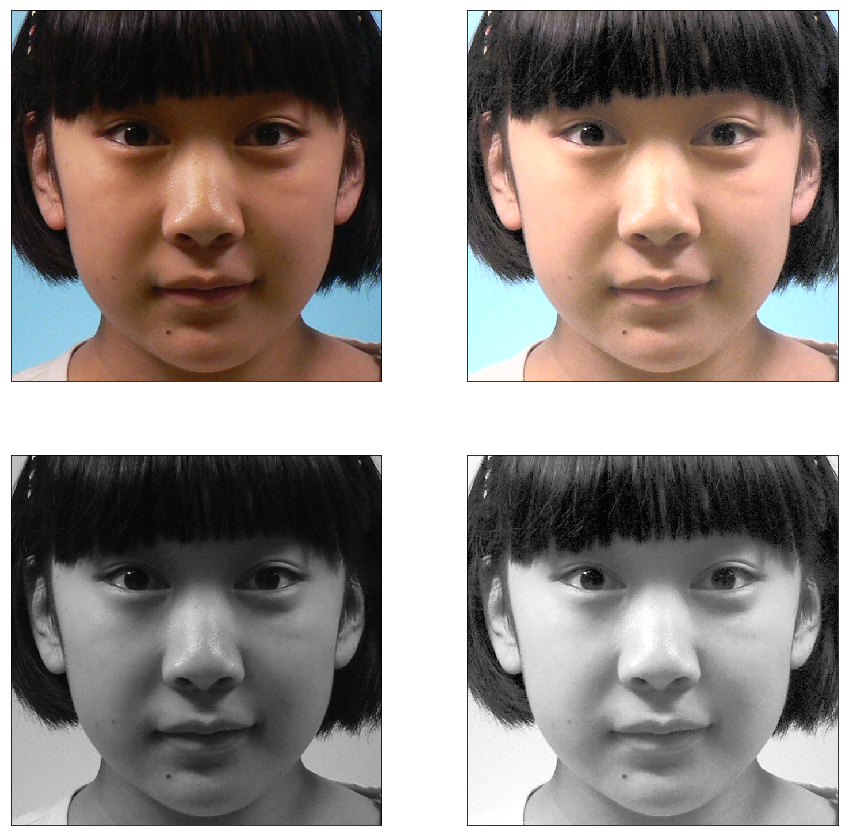

In [78]:
or_img = cv2.imread(r'C:\Users\eh\Desktop\1.jpg')
#print(or_img)
grey_face = hisEqulColor(r'C:\Users\eh\Desktop\1.jpg')
#print(gray_face)
or_rgb_img = cv2.imread(r'C:\Users\eh\Desktop\2114-20000713-20160712-1.jpg', cv2.IMREAD_COLOR)
or_rgb_img = cv2.cvtColor(or_rgb_img, cv2.COLOR_BGR2RGB)
grey_world_rgb = hisEqulColor(r'C:\Users\eh\Desktop\2114-20000713-20160712-1.jpg')
grey_world_rgb = cv2.cvtColor(grey_world_rgb, cv2.COLOR_BGR2RGB)

fig = plt.figure(figsize=(15,15))
ax1 = fig.add_subplot(221)
ax1.set_xticks([])
ax1.set_yticks([])
plt.imshow(or_rgb_img)

ax2 = fig.add_subplot(222)
ax2.set_xticks([])
ax2.set_yticks([])
plt.imshow(grey_world_rgb)

ax3 = fig.add_subplot(223)
ax3.set_xticks([])
ax3.set_yticks([])
plt.imshow(or_img)

ax4 = fig.add_subplot(224)
ax4.set_xticks([])
ax4.set_yticks([])
plt.imshow(grey_face)

In [86]:
# 单独对B、G、R三个通道进行直方图均衡化
def eq_bgr(path):
    img = cv2.imread(path, cv2.IMREAD_COLOR)

    b, g, r = cv2.split(img)
    b_eqhist = cv2.equalizeHist(b)
    g_eqhist = cv2.equalizeHist(g)
    r_eqhist = cv2.equalizeHist(r)
    img_eqhist_bgr = cv2.merge([b_eqhist, g_eqhist, r_eqhist])
    return img_eqhist_bgr
    #cv2.imwrite('deer_eq_bgr.jpg', img_eqhist_bgr)

# 转换到YCrCb色彩空间，对Y分量进行直方图均衡化
def eq_ycrcb(path):
    img = cv2.imread(path, cv2.IMREAD_COLOR)
    
    img_ycrcb = cv2.cvtColor(img, cv2.COLOR_BGR2YCrCb)
    y, cr, cb = cv2.split(img_ycrcb)
    y = cv2.equalizeHist(y)
    img_ycrcb = cv2.merge([y, cr, cb])
    img = cv2.cvtColor(img_ycrcb, cv2.COLOR_YCrCb2BGR)
    #cv2.imwrite('deer_eq.jpg', img)
    return img

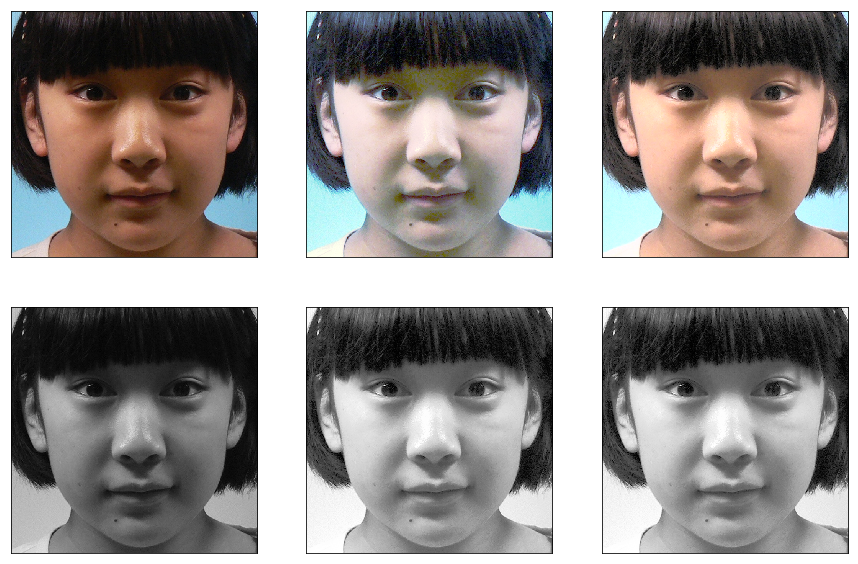

In [89]:
or_grey_img = cv2.imread(r'C:\Users\eh\Desktop\1.jpg')

eq_bgr1 = eq_bgr(r'C:\Users\eh\Desktop\1.jpg')

eq_ycrcb1 = eq_ycrcb(r'C:\Users\eh\Desktop\1.jpg')

or_rgb_img = cv2.imread(r'C:\Users\eh\Desktop\2114-20000713-20160712-1.jpg', cv2.IMREAD_COLOR)
or_rgb_img = cv2.cvtColor(or_rgb_img, cv2.COLOR_BGR2RGB)

eq_bgr2 = eq_bgr(r'C:\Users\eh\Desktop\2114-20000713-20160712-1.jpg')
eq_bgr2 = cv2.cvtColor(eq_bgr2, cv2.COLOR_BGR2RGB)

eq_ycrcb2 = eq_ycrcb(r'C:\Users\eh\Desktop\2114-20000713-20160712-1.jpg')
eq_ycrcb2 = cv2.cvtColor(eq_ycrcb2, cv2.COLOR_BGR2RGB)

fig = plt.figure(figsize=(15,10))
ax1 = fig.add_subplot(231)
ax1.set_xticks([])
ax1.set_yticks([])
plt.imshow(or_rgb_img)

ax2 = fig.add_subplot(232)
ax2.set_xticks([])
ax2.set_yticks([])
plt.imshow(eq_bgr2)

ax3 = fig.add_subplot(233)
ax3.set_xticks([])
ax3.set_yticks([])
plt.imshow(eq_ycrcb2)

ax4 = fig.add_subplot(234)
ax4.set_xticks([])
ax4.set_yticks([])
plt.imshow(or_grey_img)

ax5 = fig.add_subplot(235)
ax5.set_xticks([])
ax5.set_yticks([])
plt.imshow(eq_bgr1)

ax6 = fig.add_subplot(236)
ax6.set_xticks([])
ax6.set_yticks([])
plt.imshow(eq_ycrcb1)

In [2]:
#单尺度计算
def single_scale_retinex(img, sigma):
    temp=cv2.GaussianBlur(img, (0, 0), sigma)
    gaussian = np.where(temp == 0, 0.01, temp)
    retinex = np.log10(img+ 0.01) - np.log10(gaussian)
    return retinex

#多尺度计算
def multi_scale_retinex(img, sigma_list):
    retinex = np.zeros_like(img*1.0)
    for sigma in sigma_list:
        retinex += single_scale_retinex(img, sigma)
    retinex = retinex / len(sigma_list)
    return retinex

# 颜色恢复
def color_restoration(img, alpha, beta):
    img_sum = np.sum(img, axis=2, keepdims=True)
    cr =beta * (np.log10(alpha * img) - np.log10(img_sum))
    return cr

#在rgb三通道上分别统计每个像素值出现的次数
#将1%的最大值和最小值设置为255和0，其余值映射到（0，255）
#1cw_c1ip:0.01
#high_c11p:0.99
def simplest_color_balance(img, low_clip, high_clip):
    total = img.shape[0] * img.shape[1]

    for i in range(img.shape[2]):
        unique, counts =np.unique(img[:, :, i], return_counts=True)
        current = 0
        for u, c in zip(unique, counts):
            if float(current) / total < low_clip:
                low_val = u
            if float(current) / total < high_clip:
                high_val = u
            current += c
        #将img中元素规整到low+val到high_val区间中
        img[:, :, i] = np.maximum(np.minimum(img[:, :, i], high_val), low_val)
    return img

# MSRCR算法
def msrcr(path, sigma_list, G=5, b=25, alpha=125, beta=46, low_clip=0.01, high_clip=0.99):
    
    img = cv2.imread(path, cv2.IMREAD_COLOR)
    img  = img.astype(np.float64) + 1.0
    
    img_retinex = multi_scale_retinex(img, sigma_list)
    img_color =  color_restoration(img, alpha, beta)
    img_msrcr = G * (img_retinex * img_color + b)
    
    for i in range(img_msrcr.shape[2]):
        img_msrcr[:, :, i] =(img_msrcr[:, :, i] - np.min(img_msrcr[:,:, i])) / (np.max(img_msrcr[:, :, i]) - np.min(img_msrcr[:, :, i])) * 255
    
    img_msrcr = np.uint8(np.minimum(np.maximum(img_msrcr, 0), 255))
    img_msrcr = simplest_color_balance(img_msrcr, low_clip, high_clip)

    return img_msrcr

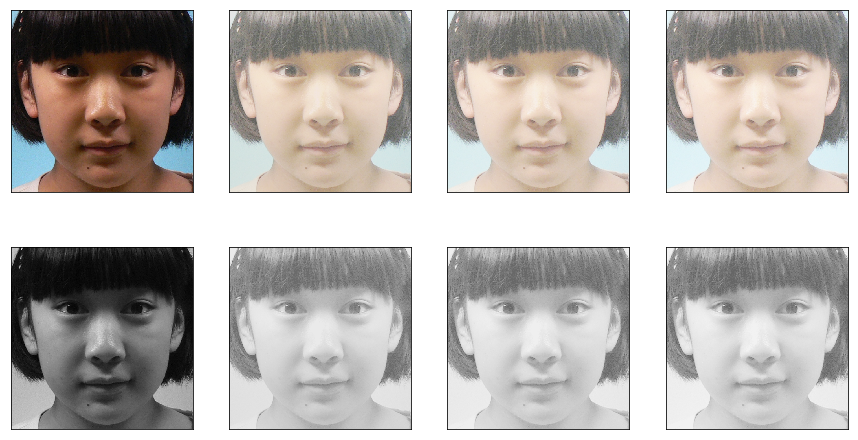

In [7]:
or_rgb_img = cv2.imread(r'C:\Users\eh\Desktop\2114-20000713-20160712-1.jpg', cv2.IMREAD_COLOR)
or_rgb_img = cv2.cvtColor(or_rgb_img, cv2.COLOR_BGR2RGB)

li = [300]
msrcr1 = msrcr(r'C:\Users\eh\Desktop\2114-20000713-20160712-1.jpg',li)
msrcr1 = cv2.cvtColor(msrcr1, cv2.COLOR_BGR2RGB)

li = [400]
msrcr2 = msrcr(r'C:\Users\eh\Desktop\2114-20000713-20160712-1.jpg',li)
msrcr2 = cv2.cvtColor(msrcr2, cv2.COLOR_BGR2RGB)

li = [500]
msrcr3 = msrcr(r'C:\Users\eh\Desktop\2114-20000713-20160712-1.jpg',li)
msrcr3 = cv2.cvtColor(msrcr3, cv2.COLOR_BGR2RGB)

or_grey_img = cv2.imread(r'C:\Users\eh\Desktop\1.jpg')

li = [300]
msrcr4 = msrcr(r'C:\Users\eh\Desktop\1.jpg',li)
msrcr4 = cv2.cvtColor(msrcr4, cv2.COLOR_BGR2RGB)

li = [400]
msrcr5 = msrcr(r'C:\Users\eh\Desktop\1.jpg',li)
msrcr5 = cv2.cvtColor(msrcr5, cv2.COLOR_BGR2RGB)

li = [500]
msrcr6 = msrcr(r'C:\Users\eh\Desktop\1.jpg',li)
msrcr6 = cv2.cvtColor(msrcr6, cv2.COLOR_BGR2RGB)

fig = plt.figure(figsize=(15,8))
ax1 = fig.add_subplot(241)
ax1.set_xticks([])
ax1.set_yticks([])
plt.imshow(or_rgb_img)

ax2 = fig.add_subplot(242)
ax2.set_xticks([])
ax2.set_yticks([])
plt.imshow(msrcr1)

ax3 = fig.add_subplot(243)
ax3.set_xticks([])
ax3.set_yticks([])
plt.imshow(msrcr2)

ax4 = fig.add_subplot(244)
ax4.set_xticks([])
ax4.set_yticks([])
plt.imshow(msrcr3)

ax1 = fig.add_subplot(245)
ax1.set_xticks([])
ax1.set_yticks([])
plt.imshow(or_grey_img)

ax2 = fig.add_subplot(246)
ax2.set_xticks([])
ax2.set_yticks([])
plt.imshow(msrcr4)

ax3 = fig.add_subplot(247)
ax3.set_xticks([])
ax3.set_yticks([])
plt.imshow(msrcr5)

ax4 = fig.add_subplot(248)
ax4.set_xticks([])
ax4.set_yticks([])
plt.imshow(msrcr6)

In [137]:
def white_balance(path):
    
    img = cv2.imread(path, cv2.IMREAD_COLOR)
    rows = img.shape[0]
    cols = img.shape[1]
    
    final = cv2.cvtColor(img, cv2.COLOR_BGR2LAB)
    
    avg_a = np.average(final[:,:,1])
    avg_b = np.average(final[:,:,2])
    
    for x in range(final.shape[0]):
        for y in range(final.shape[1]):
            l, a, b = final[x, y ,:]
            l *= 100 / 255.0
            final[x, y, 1] = a - ((avg_a - 128) * (l / 100.0) * 1.1)
            final[x, y, 2] = a - ((avg_b - 128) * (l / 100.0) * 1.1)
            
    final = cv2.cvtColor(final, cv2.COLOR_LAB2BGR)
    
    return final

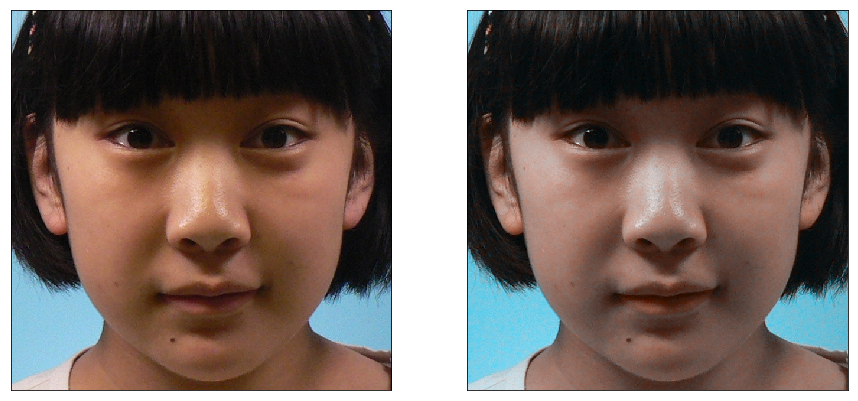

In [141]:
or_rgb_img = cv2.imread(r'C:\Users\eh\Desktop\2114-20000713-20160712-1.jpg', cv2.IMREAD_COLOR)
or_rgb_img = cv2.cvtColor(or_rgb_img, cv2.COLOR_BGR2RGB)

li = [500]
wb1 = white_balance(r'C:\Users\eh\Desktop\2114-20000713-20160712-1.jpg')
wb1 = cv2.cvtColor(wb1, cv2.COLOR_BGR2RGB)

fig = plt.figure(figsize=(15,10))
ax1 = fig.add_subplot(121)
ax1.set_xticks([])
ax1.set_yticks([])
plt.imshow(or_rgb_img)

ax2 = fig.add_subplot(122)
ax2.set_xticks([])
ax2.set_yticks([])
plt.imshow(wb1)

In [146]:
#饱和函数  
def calc_saturation(diff,slope,limit):  
    ret = diff * slope  
    if ret > limit:  
        ret = limit  
    elif (ret < (-limit)):  
        ret = -limit  
    return ret  
 
def automatic_color_equalization(path, slope=10, limit=1000, samples=500):  
 
    nimg = cv2.imread(path, cv2.IMREAD_COLOR)
    nimg = nimg.transpose(2, 0, 1)  
  
    #Convert input to an ndarray with column-major memory order(仅仅是地址连续，内容和结构不变)  
    nimg = np.ascontiguousarray(nimg, dtype=np.uint8)  

    width=nimg.shape[2]  
    height=nimg.shape[1]  
  
    cary=[]  
  
    #随机产生索引  
    for i in range(0,samples):  
        _x=np.random.randint(0,width)%width  
        _y=np.random.randint(0,height)%height  
 
        dict={"x":_x,"y":_y}  
        cary.append(dict)  
 
 
    mat=np.zeros((3,height,width),float)  

    r_max = sys.float_info.min  
    r_min = sys.float_info.max  

    g_max = sys.float_info.min  
    g_min = sys.float_info.max  

    b_max = sys.float_info.min  
    b_min = sys.float_info.max  
  
    for i in range(height):  
        for j in range(width):  
            r=nimg[0,i,j]  
            g=nimg[1,i,j]  
            b=nimg[2,i,j]  

            r_rscore_sum = 0.0  
            g_rscore_sum = 0.0  
            b_rscore_sum = 0.0  
            denominator = 0.0  
  
            for _dict in cary:  
                _x=_dict["x"] #width  
                _y=_dict["y"] #height  
  
                #计算欧氏距离  
                dist=np.sqrt(np.square(_x-j)+np.square(_y-i))  
                if (dist < height / 5):  
                    continue;  
 
                _sr=nimg[0,_y,_x]  
                _sg=nimg[1,_y,_x]  
                _sb=nimg[2,_y,_x]  
  
                r_rscore_sum +=calc_saturation(int(r) - int(_sr),slope,limit) / dist  
                g_rscore_sum +=calc_saturation(int(g) - int(_sg),slope,limit) / dist  
                b_rscore_sum +=calc_saturation(int(b) - int(_sb),slope,limit) / dist  
 
                denominator += limit / dist  
 
            r_rscore_sum = r_rscore_sum / denominator  
            g_rscore_sum = g_rscore_sum / denominator  
            b_rscore_sum = b_rscore_sum / denominator  
  
            mat[0,i,j]=r_rscore_sum  
            mat[1,i,j]=g_rscore_sum  
            mat[2,i,j]=b_rscore_sum  
 
            if r_max<r_rscore_sum:  
                r_max=r_rscore_sum  
            if r_min>r_rscore_sum:  
                r_min=r_rscore_sum  
  
            if g_max<g_rscore_sum:  
                g_max=g_rscore_sum  
            if g_min>g_rscore_sum:  
                g_min=g_rscore_sum  
  
            if b_max<b_rscore_sum:  
                b_max=b_rscore_sum  
            if b_min>b_rscore_sum:  
                b_min=b_rscore_sum  
  
    for i in range(height):  
        for j in range(width):  
            nimg[0, i, j] = (mat[0, i, j] - r_min) * 255 / (r_max - r_min)  
            nimg[1, i, j] = (mat[1, i, j] - g_min) * 255 / (g_max - g_min)  
            nimg[2, i, j] = (mat[2, i, j] - b_min) * 255 / (b_max - b_min)  
  
    img = nimg.transpose(1, 2, 0).astype(np.uint8)
    return img

In [ ]:
or_rgb_img = cv2.imread(r'C:\Users\eh\Desktop\2114-20000713-20160712-1.jpg', cv2.IMREAD_COLOR)
or_rgb_img = cv2.cvtColor(or_rgb_img, cv2.COLOR_BGR2RGB)

ace1 = automatic_color_equalization(r'C:\Users\eh\Desktop\2114-20000713-20160712-1.jpg')
ace1 = cv2.cvtColor(ace1, cv2.COLOR_BGR2RGB)

fig = plt.figure(figsize=(15,10))
ax1 = fig.add_subplot(121)
ax1.set_xticks([])
ax1.set_yticks([])
plt.imshow(or_rgb_img)

ax2 = fig.add_subplot(122)
ax2.set_xticks([])
ax2.set_yticks([])
plt.imshow(ace1)